# 🎓 Building a Multiple Linear Regression Model

This notebook describes how to build a multiple linear regression model using the scikit-learn package’s built-in **LinearRegression()** class. The previously used ‘Advertising’ dataset is employed to predict product sales based on advertising spending. 

Here, we assume a **multiple linear regression model**, meaning the output (sales) depends on three input features: the **TV, Radio, and Newspaper advertising budgets**.

In [13]:
# Import necessary libraries
import pandas as pd
import numpy as np

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For building the model and evaluating it
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Set a style for our plots
sns.set_style('whitegrid')

In [14]:
df = pd.read_csv('advertising.csv')

# Let's look at the first few rows of our data
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


In [15]:
# 1. Prepare the data with all three features
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

In [16]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# 3. Create and train the model
model_multi_regre = LinearRegression()
model_multi_regre.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [18]:
print("--- Multiple Linear Regression Results ---")
print(f"Intercept: {model_multi_regre.intercept_:.4f}")
print(f"Coefficients: {model_multi_regre.coef_}")

--- Multiple Linear Regression Results ---
Intercept: 4.7141
Coefficients: [0.05450927 0.10094536 0.00433665]


In [19]:
# 4. Evaluate the new model

# Make predictions on the test data
y_pred = model_multi_regre.predict(X_test)

# Calculate and print the evaluation metrics
mse_value = metrics.mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse_value:.4f}")


rmse_value = np.sqrt(mse_value)
print(f"Root Mean Squared Error (RMSE): {rmse_value:.4f}")

Mean Squared Error (MSE): 2.9078
Root Mean Squared Error (RMSE): 1.7052


### Now, let's visualize the relationships of Sales with TV, Radio, and Newspaper advertising budgets

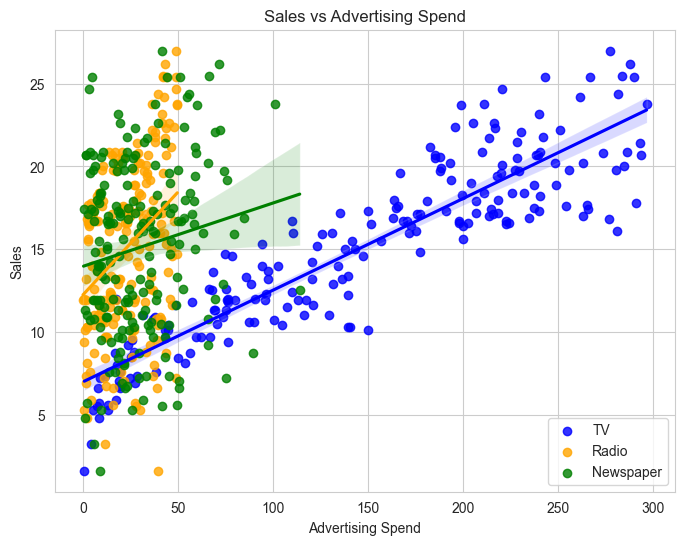

In [20]:
plt.figure(figsize=(8, 6)) 
# For all TV, Radio, and Newspaper
sns.regplot(x=df['TV'], y=df['Sales'], label='TV', color='blue')
sns.regplot(x=df['Radio'], y=df['Sales'], label='Radio', color='orange')
sns.regplot(x=df['Newspaper'], y=df['Sales'], label='Newspaper', color='green')
plt.title('Sales vs Advertising Spend')
plt.xlabel('Advertising Spend')
plt.ylabel('Sales')
plt.legend()
plt.show()

### Now, let's visualize the relationships of Sales with TV, Radio, and Newspaper advertising budgets in separate subplots.

### Here, we create a figure with three subplots, one for each advertising medium.

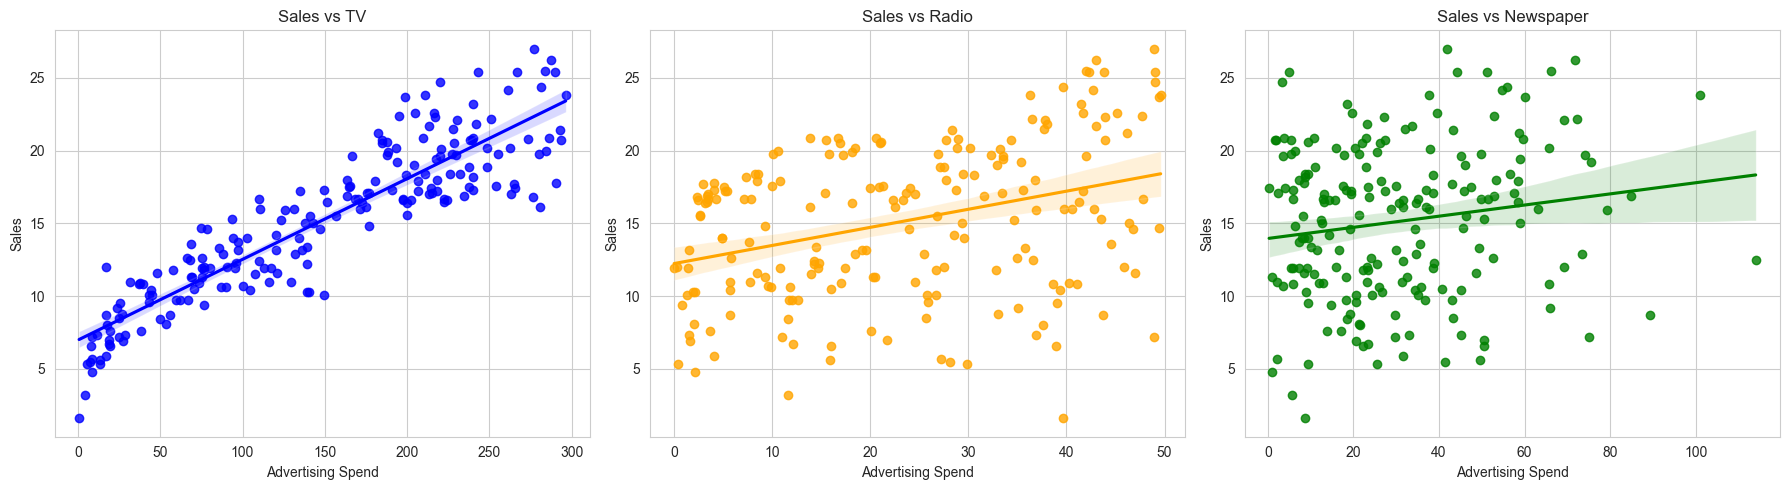

In [21]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

sns.regplot(x=df['TV'], y=df['Sales'], ax=axs[0], color='blue')
axs[0].set_title('Sales vs TV')

sns.regplot(x=df['Radio'], y=df['Sales'], ax=axs[1], color='orange')
axs[1].set_title('Sales vs Radio')

sns.regplot(x=df['Newspaper'], y=df['Sales'], ax=axs[2], color='green')
axs[2].set_title('Sales vs Newspaper')

for ax in axs:
    ax.set_xlabel('Advertising Spend')
    ax.set_ylabel('Sales')

plt.tight_layout()
plt.show()

### Now, let's make predictions using the trained model by providing a new data sample.

In [22]:
new_data_sample = pd.DataFrame({
    'TV': [150, 200],   
    'Radio': [30, 40],
    'Newspaper': [20, 25]
})

predictions = model_multi_regre.predict(new_data_sample)
print("Predictions for new data sample:", predictions)

Predictions for new data sample: [16.00561084 19.76221124]


### Model Evaluation: here we assess the performance of our model using various metrics (MSE, RMSE).

In [12]:
y_pred = model_multi_regre.predict(X_test)
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Squared Error: 2.9077569102710896
Root Mean Squared Error: 1.7052146229349223
